In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
import os

from ManagerUniverse import ManagerUniverse
import DataParser
import Entities
from tqdm import tqdm
import math


# Manager Universe

In [2]:
# Directory where your CSV files are stored
directory_path = "sub_manager_returns"
manager_files = os.listdir(directory_path)
len(manager_files)

13

In [3]:
returns_folder = 'sub_manager_returns'
start_date = "2003-01-01"
end_date = "2023-03-01"

test_start_date = "2023-04-01"
test_end_date = "2023-04-01"
# the para here can set to be the desired correlation.
universe = ManagerUniverse(0.3)

print("Initializing Universe...\n")
universe.populate_managers(returns_folder, start_date=start_date, end_date=end_date, test_start_date=test_start_date, test_end_date = test_end_date)

Initializing Universe...



In [4]:
print("Original Portfolio")
df_op = universe.original_portfolio()
df_op

Original Portfolio


,Breakout,Castlefield Associates,DCM Systematic,Landscape,Machina,Mulvaney,Panview,PlusPlus Capital Management,Rosetta_x,Rosetta_y,Teza_x,Teza_y,Trident
Date,,,,,,,,,,,,,
2003-01-01,NaN,NaN,NaN,NaN,NaN,0.1320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-02-01,NaN,NaN,NaN,NaN,NaN,0.0722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-01,NaN,NaN,NaN,NaN,NaN,-0.1283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-01,NaN,NaN,NaN,NaN,NaN,0.0145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-01,NaN,NaN,NaN,NaN,NaN,0.0764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,-0.0309,0.0313,0.0089,-0.0052,0.001,-0.1877,-0.0040,-0.002,0.0666,-0.0307,-0.0382,-0.0024,0.008
2022-12-01,0.0114,0.0201,-0.0094,0.0234,-0.004,0.0667,-0.0060,0.001,-0.0572,-0.0091,-0.0511,-0.0629,-0.006
2023-01-01,0.0305,-0.0037,-0.0113,-0.0073,-0.021,0.0561,-0.0335,0.000,-0.0442,0.0603,-0.0173,0.0343,0.007


In [5]:
print("\nAdded all Managers. Performing calculations...")
universe.perform_manager_stats_calculations()
print("\nFinished calculations. Correlating...")
universe.populate_clusters()


Added all Managers. Performing calculations...

Finished calculations. Correlating...


# Ratings and Test Return Portfolios

In [6]:
print("All clusters have been created. Calculating Scores and Weights for all managers...")
ratings_df = universe.ratings_df()
ratings_df

All clusters have been created. Calculating Scores and Weights for all managers...


,Omega Value,Omega Score,Sharpe Ratio,Sharpe Score,Drawdown Area,Drawdown Score,Score,Overall Score,weights,Vol Weights
Name,,,,,,,,,,
Breakout,1.479528,1,6.339291,2,-0.198482,4,0.500000,1,0.047120,0.067013
Castlefield Associates,0.387200,1,-13.132862,1,-0.203938,4,1.000000,4,0.094241,0.115167
DCM Systematic,1.632309,3,7.418440,3,-0.091151,2,0.666667,2,0.062827,0.076023
Landscape,2.327620,5,13.149649,5,-0.092963,2,1.000000,4,0.094241,0.091063
Machina,2.740076,5,15.443858,5,-0.049456,1,1.000000,4,0.094241,0.119627
Mulvaney,1.510264,2,4.911752,1,-0.450818,5,0.333333,1,0.031414,0.023893
Panview,2.072552,4,11.885088,5,-0.075689,1,1.000000,4,0.094241,0.070117
PlusPlus Capital Management,2.125358,5,10.460857,4,-0.042775,1,1.000000,4,0.094241,0.140082
Rosetta,1.526563,2,5.586779,2,-0.249111,5,0.500000,1,0.047120,0.042606


In [7]:
print("\nThe return portfolio is as followed: ")
df_rp = universe.returns_portfolio()
df_rp.tail()


The return portfolio is as followed: 


,Breakout Returns,Castlefield Associates Returns,DCM Systematic Returns,Landscape Returns,Machina Returns,Mulvaney Returns,Panview Returns,PlusPlus Capital Management Returns,Rosetta Returns_x,Rosetta Returns_y,Teza Returns_x,Teza Returns_y,Trident Returns
Date,,,,,,,,,,,,,
2023-04-01,0.0454,-0.0104,-0.0074,0.0105,0.008,0.1528,0.034,0.0,0.0108,-0.0566,0.0137,0.0143,0.001


In [8]:
df_rp_weight = universe.weighted_returns_portfolio()
df_rp_weight.tail()

,Breakout Weighted Returns,Castlefield Associates Weighted Returns,DCM Systematic Weighted Returns,Landscape Weighted Returns,Machina Weighted Returns,Mulvaney Weighted Returns,Panview Weighted Returns,PlusPlus Capital Management Weighted Returns,Rosetta Weighted Returns_x,Rosetta Weighted Returns_y,Teza Weighted Returns_x,Teza Weighted Returns_y,Trident Weighted Returns
Date,,,,,,,,,,,,,
2023-04-01,0.002139,-0.00098,-0.000465,0.00099,0.000754,0.0048,0.003204,0.0,0.000509,-0.005334,0.001291,0.001348,0.000058


In [9]:
df_vol_weight = universe.volatility_weighted_returns_portfolio()
df_vol_weight.tail()

,Breakout Weighted Returns,Castlefield Associates Weighted Returns,DCM Systematic Weighted Returns,Landscape Weighted Returns,Machina Weighted Returns,Mulvaney Weighted Returns,Panview Weighted Returns,PlusPlus Capital Management Weighted Returns,Rosetta Weighted Returns_x,Rosetta Weighted Returns_y,Teza Weighted Returns_x,Teza Weighted Returns_y,Trident Weighted Returns
Date,,,,,,,,,,,,,
2023-04-01,0.003042,-0.001198,-0.000563,0.000956,0.000957,0.003651,0.002384,0.0,0.00046,-0.001959,0.001039,0.001027,0.000072


In [10]:
df_eq_weight = universe.equal_weighted_returns_portfolio()
df_eq_weight.tail()

,Breakout Equal Weighted Returns,Castlefield Associates Equal Weighted Returns,DCM Systematic Equal Weighted Returns,Landscape Equal Weighted Returns,Machina Equal Weighted Returns,Mulvaney Equal Weighted Returns,Panview Equal Weighted Returns,PlusPlus Capital Management Equal Weighted Returns,Rosetta Equal Weighted Returns_x,Rosetta Equal Weighted Returns_y,Teza Equal Weighted Returns_x,Teza Equal Weighted Returns_y,Trident Equal Weighted Returns
Date,,,,,,,,,,,,,
2023-04-01,0.003492,-0.0008,-0.000569,0.000808,0.000615,0.011754,0.002615,0.0,0.000831,-0.004354,0.001054,0.0011,0.000077


# Analysis

In [11]:
df_rp_weight

,Breakout Weighted Returns,Castlefield Associates Weighted Returns,DCM Systematic Weighted Returns,Landscape Weighted Returns,Machina Weighted Returns,Mulvaney Weighted Returns,Panview Weighted Returns,PlusPlus Capital Management Weighted Returns,Rosetta Weighted Returns_x,Rosetta Weighted Returns_y,Teza Weighted Returns_x,Teza Weighted Returns_y,Trident Weighted Returns
Date,,,,,,,,,,,,,
2023-04-01,0.002139,-0.00098,-0.000465,0.00099,0.000754,0.0048,0.003204,0.0,0.000509,-0.005334,0.001291,0.001348,0.000058


# Loop

In [12]:
df_vol_weight

,Breakout Weighted Returns,Castlefield Associates Weighted Returns,DCM Systematic Weighted Returns,Landscape Weighted Returns,Machina Weighted Returns,Mulvaney Weighted Returns,Panview Weighted Returns,PlusPlus Capital Management Weighted Returns,Rosetta Weighted Returns_x,Rosetta Weighted Returns_y,Teza Weighted Returns_x,Teza Weighted Returns_y,Trident Weighted Returns
Date,,,,,,,,,,,,,
2023-04-01,0.003042,-0.001198,-0.000563,0.000956,0.000957,0.003651,0.002384,0.0,0.00046,-0.001959,0.001039,0.001027,0.000072


In [13]:
date_range = pd.date_range(start='2022-01-01', end='2023-06-01', freq='MS')

EMP_df = pd.DataFrame()
vol_df = pd.DataFrame()
equal_df = pd.DataFrame()
weighted_df = pd.DataFrame()

for i in tqdm(range(len(date_range) - 1)):
    returns_folder = 'sub_manager_returns'
    start_date = "2003-01-01"    
    end_date = date_range[i].strftime('%Y-%m-%d')
    
    test_start_date = date_range[i + 1].strftime('%Y-%m-%d')    
    test_end_date = test_start_date
    
    print(f"Processing period: Start date = {start_date}, End date = {end_date}, Test start date = {test_start_date}, Test end date = {test_end_date}")
    universe = ManagerUniverse(0.3)

    #print("Initializing Universe...\n")
    universe.populate_managers(returns_folder, start_date=start_date, end_date=end_date, test_start_date=test_start_date, test_end_date = test_end_date)

    #print("\nAdded all Managers. Performing calculations...")
    universe.perform_manager_stats_calculations()
    #print("\nFinished calculations. Correlating...")
    universe.populate_clusters()
    #print("All clusters have been created. Calculating Scores and Weights for all managers...")
    ratings_df = universe.ratings_df()

    #print("\nThe return portfolio is as followed: ")
    df_rp = universe.returns_portfolio()
    df_rp_weight = universe.weighted_returns_portfolio()
    df_vol_weight = universe.volatility_weighted_returns_portfolio()
    df_eq_weight = universe.equal_weighted_returns_portfolio()
        
    EMP_df = pd.concat([EMP_df, df_rp_weight])
    vol_df = pd.concat([vol_df, df_vol_weight])
    equal_df = pd.concat([equal_df, df_eq_weight])

    weighted_df = pd.concat([weighted_df, ratings_df])    


  0%|          | 0/17 [00:00<?, ?it/s]

Processing period: Start date = 2003-01-01, End date = 2022-01-01, Test start date = 2022-02-01, Test end date = 2022-02-01


  6%|▌         | 1/17 [00:00<00:13,  1.20it/s]

Processing period: Start date = 2003-01-01, End date = 2022-02-01, Test start date = 2022-03-01, Test end date = 2022-03-01


 12%|█▏        | 2/17 [00:01<00:08,  1.73it/s]

Processing period: Start date = 2003-01-01, End date = 2022-03-01, Test start date = 2022-04-01, Test end date = 2022-04-01


 18%|█▊        | 3/17 [00:01<00:07,  1.95it/s]

Processing period: Start date = 2003-01-01, End date = 2022-04-01, Test start date = 2022-05-01, Test end date = 2022-05-01


 24%|██▎       | 4/17 [00:02<00:06,  2.10it/s]

Processing period: Start date = 2003-01-01, End date = 2022-05-01, Test start date = 2022-06-01, Test end date = 2022-06-01


 29%|██▉       | 5/17 [00:02<00:05,  2.06it/s]

Processing period: Start date = 2003-01-01, End date = 2022-06-01, Test start date = 2022-07-01, Test end date = 2022-07-01


 35%|███▌      | 6/17 [00:03<00:05,  1.84it/s]

Processing period: Start date = 2003-01-01, End date = 2022-07-01, Test start date = 2022-08-01, Test end date = 2022-08-01


 41%|████      | 7/17 [00:03<00:04,  2.00it/s]

Processing period: Start date = 2003-01-01, End date = 2022-08-01, Test start date = 2022-09-01, Test end date = 2022-09-01


 47%|████▋     | 8/17 [00:04<00:04,  2.04it/s]

Processing period: Start date = 2003-01-01, End date = 2022-09-01, Test start date = 2022-10-01, Test end date = 2022-10-01


 53%|█████▎    | 9/17 [00:04<00:03,  2.04it/s]

Processing period: Start date = 2003-01-01, End date = 2022-10-01, Test start date = 2022-11-01, Test end date = 2022-11-01


 59%|█████▉    | 10/17 [00:05<00:03,  2.07it/s]

Processing period: Start date = 2003-01-01, End date = 2022-11-01, Test start date = 2022-12-01, Test end date = 2022-12-01


 65%|██████▍   | 11/17 [00:05<00:02,  2.17it/s]

Processing period: Start date = 2003-01-01, End date = 2022-12-01, Test start date = 2023-01-01, Test end date = 2023-01-01


 71%|███████   | 12/17 [00:05<00:02,  2.30it/s]

Processing period: Start date = 2003-01-01, End date = 2023-01-01, Test start date = 2023-02-01, Test end date = 2023-02-01


 76%|███████▋  | 13/17 [00:06<00:01,  2.40it/s]

Processing period: Start date = 2003-01-01, End date = 2023-02-01, Test start date = 2023-03-01, Test end date = 2023-03-01


 82%|████████▏ | 14/17 [00:06<00:01,  2.42it/s]

Processing period: Start date = 2003-01-01, End date = 2023-03-01, Test start date = 2023-04-01, Test end date = 2023-04-01


 88%|████████▊ | 15/17 [00:07<00:00,  2.33it/s]

Processing period: Start date = 2003-01-01, End date = 2023-04-01, Test start date = 2023-05-01, Test end date = 2023-05-01


 94%|█████████▍| 16/17 [00:07<00:00,  2.32it/s]

Processing period: Start date = 2003-01-01, End date = 2023-05-01, Test start date = 2023-06-01, Test end date = 2023-06-01


100%|██████████| 17/17 [00:07<00:00,  2.13it/s]


EMP Weights: {'Total Return (%)': 0.12863782572537463, 'Annualized Return (%)': 0.09500461865158227, 'Annualized Std Dev (%)': 0.04611427697692038, 'Sharpe Ratio': 1.4096419354924783}
Vol Weights: {'Total Return (%)': 0.111306765269785, 'Annualized Return (%)': 0.0823693076839358, 'Annualized Std Dev (%)': 0.032824321629374396, 'Sharpe Ratio': 1.595442192994802}
Equal Weights: {'Total Return (%)': 0.1897177996545163, 'Annualized Return (%)': 0.13915539004553001, 'Annualized Std Dev (%)': 0.0518209501897171, 'Sharpe Ratio': 2.1063949936446718}


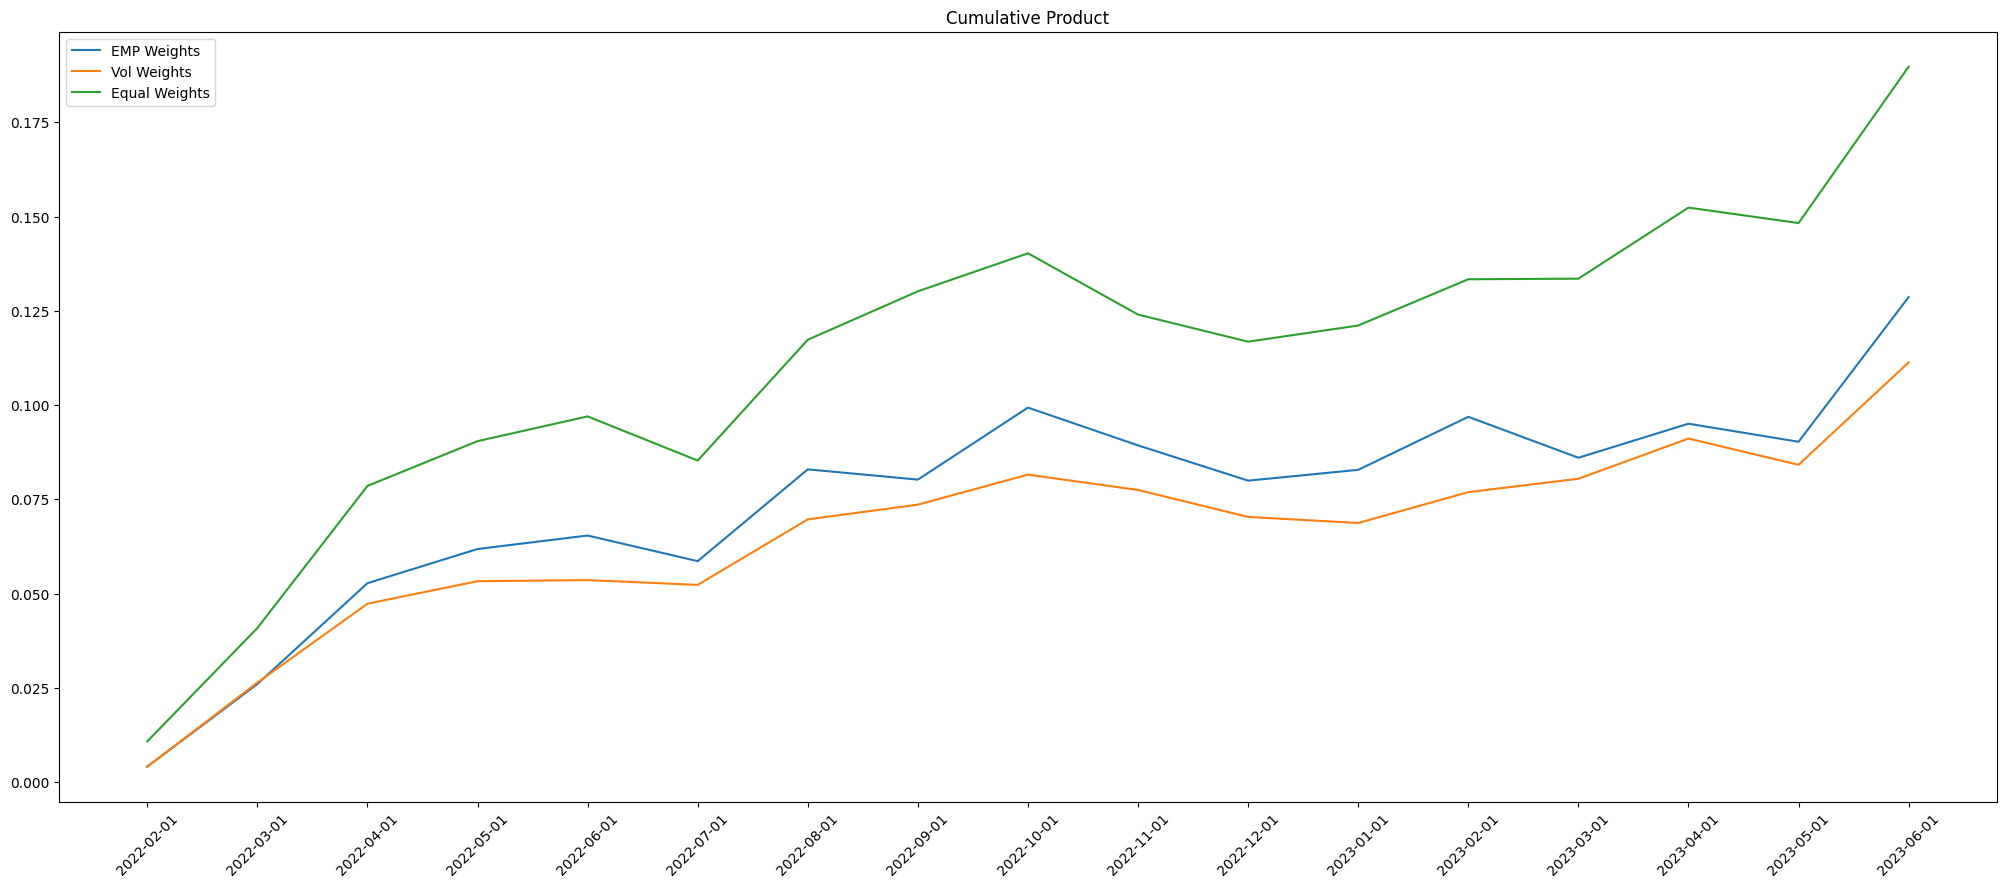

In [14]:
df_list = [EMP_df, vol_df, equal_df]
ManagerUniverse.Portfolio_Performance(df_list)

In [15]:
weighted_df

,Omega Value,Omega Score,Sharpe Ratio,Sharpe Score,Drawdown Area,Drawdown Score,Score,Overall Score,weights,Vol Weights
Name,,,,,,,,,,
Breakout,1.392650,2,5.458313,2,-0.198482,4,0.333333,1,0.033149,0.076674
Castlefield Associates,0.185173,1,-21.564049,1,-0.122481,4,1.000000,4,0.099448,0.122709
DCM Systematic,1.637210,3,7.472746,3,-0.091151,2,0.611111,2,0.060773,0.074674
Landscape,2.380720,5,13.369447,4,-0.092963,2,1.000000,4,0.099448,0.092639
Machina,2.903685,5,16.476658,5,-0.049456,1,1.000000,4,0.099448,0.114177
...,...,...,...,...,...,...,...,...,...,...
Rosetta,1.501162,2,5.316419,2,-0.249111,5,0.500000,1,0.047120,0.042610
Rosetta,1.449532,2,5.169538,1,-0.213397,4,1.000000,4,0.094241,0.034564
Teza,1.583646,3,7.273600,3,-0.114288,3,1.000000,4,0.094241,0.076525
